In [2]:
import os
import pandas as pd
import numpy as np

# Script to combine all signals
# Set the data path
DATA_PATH = r"C:\Users\pc\Desktop\Data Science A2\SAAD\Stress-Predict-Dataset-main"

# Set the save path
SAVE_PATH = r"C:\Users\pc\Desktop\Data Science A2\SAAD"

# Create the save path directory if it doesn't exist
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'BVP': ['id', 'BVP', 'datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'IBI': ['id', 'Initial', 'Interval', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime']
}

names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'BVP.csv': ['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'], 
    'IBI.csv': ['Initial', 'Interval'],
    'TEMP.csv': ['TEMP']
}

desired_signals = ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'IBI.csv', 'TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
bvp = pd.DataFrame(columns=final_columns['BVP'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
ibi = pd.DataFrame(columns=final_columns['IBI'])
temp = pd.DataFrame(columns=final_columns['TEMP'])


def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

#Combine data with same names in multiple folders
for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)
    if os.path.isdir(folder_path):
        print(f'Processing {folder}')
        for sub_folder in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                print(f'Processing {sub_folder} in {folder}')
                for signal in os.listdir(sub_folder_path):
                    if os.path.isfile(os.path.join(sub_folder_path, signal)):
                        if signal in desired_signals:
                            df = pd.read_csv(os.path.join(sub_folder_path, signal), names=names[signal], header=None)
                            if not df.empty:
                                if signal == 'ACC.csv':
                                    acc = pd.concat([acc, process_df(df, folder)])
                                    print("ACC df:", acc)
                                if signal == 'BVP.csv':
                                    bvp = pd.concat([bvp, process_df(df, folder)])
                                    print("BVP df:", bvp)
                                if signal == 'EDA.csv':
                                    eda = pd.concat([eda, process_df(df, folder)])
                                    print("EDA df:", eda)
                                if signal == 'HR.csv':
                                    hr = pd.concat([hr, process_df(df, folder)])
                                    print("HR df:", hr)
                                if signal == 'IBI.csv':
                                    ibi = pd.concat([ibi, process_df(df, folder)])
                                    print("IBI df:", ibi)
                                if signal == 'TEMP.csv':
                                    temp = pd.concat([temp, process_df(df, folder)])
                                    print("TEMP df:", temp)
                            else:
                                print(f"{signal} in {sub_folder} is empty")
                    else:
                        print(f"{signal} in {sub_folder} is not a file")
            else:
                print(f"{sub_folder} in {folder} is not a directory")
    else:
        print(f"{folder} is not a directory")

#Saving combined data
print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
bvp.to_csv(os.path.join(SAVE_PATH, 'combined_bvp.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
ibi.to_csv(os.path.join(SAVE_PATH, 'combined_ibi.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)

LICENSE is not a directory
Processing Processed_data
Processing .ipynb_checkpoints in Processed_data
Improved_All_Combined_hr_rsp_binary.csv in Processed_data is not a directory
Questionnaires_scores.xlsx in Processed_data is not a directory
Readme in Processed_data is not a directory
Time_logs.xlsx in Processed_data is not a directory
Processing Raw_data
Readme in Raw_data is not a directory
Processing S01 in Raw_data
ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
104305  ta  35.0   2.0  49.0  1644229320.53125
104306  ta  34.0   3.0  50.0   1644229320.5625
104307  ta  35.0   2.0  51.0  1644229320.59375
104308  ta  33.0   5.0  50.0    1644229320.625
104309  ta  34.0   3.0  49.0  1644229320.65625

[104

ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
113233  ta  51.0   2.0  37.0  1644236927.53125
113234  ta  52.0   1.0  35.0   1644236927.5625
113235  ta  52.0   1.0  35.0  1644236927.59375
113236  ta  50.0   1.0  35.0    1644236927.625
113237  ta  52.0   2.0  36.0  1644236927.65625

[437808 rows x 5 columns]
BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
226529  ta  165.15  1644236928.515625
226530  ta  149.44   1644236928.53125
226531  ta  134.88  1644236928.546875
226532  ta  1

ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
108169  ta -23.0   1.0  59.0  1644838014.28125
108170  ta -23.0   1.0  59.0   1644838014.3125
108171  ta -23.0   1.0  59.0  1644838014.34375
108172  ta -22.0   1.0  60.0    1644838014.375
108173  ta -23.0   2.0  59.0  1644838014.40625

[757068 rows x 5 columns]
BVP df:         id    BVP           datetime
0       ta    0.0       1644226061.0
1       ta    0.0  1644226061.015625
2       ta    0.0   1644226061.03125
3       ta    0.0  1644226061.046875
4       ta    0.0    1644226061.0625
...     ..    ...                ...
216288  ta  -1.34       1644838013.5
216289  ta  12.08  1644838013.515625
216290  ta  24.76   1644838013.53125
216291  ta  36.46  1644

ACC df:        id    X     Y     Z          datetime
0      ta -2.0  43.0  43.0      1644226061.0
1      ta -2.0  44.0  46.0  1644226061.03125
2      ta  2.0  44.0  47.0   1644226061.0625
3      ta  3.0  43.0  44.0  1644226061.09375
4      ta  1.0  43.0  45.0    1644226061.125
...    ..  ...   ...   ...               ...
97195  ta  4.0  -2.0  64.0  1644847496.34375
97196  ta  3.0  -2.0  64.0    1644847496.375
97197  ta  3.0  -2.0  63.0  1644847496.40625
97198  ta  2.0  -2.0  62.0   1644847496.4375
97199  ta  3.0  -3.0  63.0  1644847496.46875

[1056774 rows x 5 columns]
BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
194409  ta -115.03  1644847496.640625
194410  ta -129.06   1644847496.65625
194411  ta -144.23  1644847496.671875
194412  ta -155.62    1644847496.687

ACC df:         id    X     Y     Z          datetime
0       ta -2.0  43.0  43.0      1644226061.0
1       ta -2.0  44.0  46.0  1644226061.03125
2       ta  2.0  44.0  47.0   1644226061.0625
3       ta  3.0  43.0  44.0  1644226061.09375
4       ta  1.0  43.0  45.0    1644226061.125
...     ..  ...   ...   ...               ...
107071  ta -5.0 -26.0  57.0  1645445992.96875
107072  ta -1.0 -25.0  57.0      1645445993.0
107073  ta  5.0 -25.0  62.0  1645445993.03125
107074  ta -1.0 -25.0  63.0   1645445993.0625
107075  ta -7.0 -26.0  56.0  1645445993.09375

[1375716 rows x 5 columns]
BVP df:         id    BVP           datetime
0       ta    0.0       1644226061.0
1       ta    0.0  1644226061.015625
2       ta    0.0   1644226061.03125
3       ta    0.0  1644226061.046875
4       ta    0.0    1644226061.0625
...     ..    ...                ...
214077  ta  85.12  1645445991.953125
214078  ta  79.04   1645445991.96875
214079  ta  68.31  1645445991.984375
214080  ta  53.38       1645445992

TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28.39  1644226061.75
4      ta  28.39   1644226062.0
...    ..    ...            ...
13835  ta  31.39  1645450447.75
13836  ta  31.39   1645450448.0
13837  ta  31.39  1645450448.25
13838  ta  31.39   1645450448.5
13839  ta  31.39  1645450448.75

[200128 rows x 3 columns]
Processing S16 in Raw_data
ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
110257  ta   9.0   6.0  62.0  1645452591.53125
110258  ta   9.0   7.0  62.0   1645452591.5625
110259  ta   9.0   7.0  62.0  1645452591.59375
110260  ta   9.0   7.0  62.0    1645452591.625
110261  ta  10.0   7.0  62.0

Processing S19 in Raw_data
ACC df:         id    X     Y     Z          datetime
0       ta -2.0  43.0  43.0      1644226061.0
1       ta -2.0  44.0  46.0  1644226061.03125
2       ta  2.0  44.0  47.0   1644226061.0625
3       ta  3.0  43.0  44.0  1644226061.09375
4       ta  1.0  43.0  45.0    1644226061.125
...     ..  ...   ...   ...               ...
102175  ta  1.0   8.0  63.0  1646043122.96875
102176  ta  2.0   8.0  63.0      1646043123.0
102177  ta  1.0   8.0  64.0  1646043123.03125
102178  ta  0.0   7.0  63.0   1646043123.0625
102179  ta  1.0   8.0  63.0  1646043123.09375

[2028726 rows x 5 columns]
BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
204386  ta  110.47   1646043123.53125
204387  ta  120.65  1646043123.546875
204388  ta  120.65    1646043123.56

TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28.39  1644226061.75
4      ta  28.39   1644226062.0
...    ..    ...            ...
12899  ta  31.61  1646051861.75
12900  ta  31.61   1646051862.0
12901  ta  31.61  1646051862.25
12902  ta  31.61   1646051862.5
12903  ta  31.61  1646051862.75

[280088 rows x 3 columns]
Processing S22 in Raw_data
ACC df:        id     X     Y     Z          datetime
0      ta  -2.0  43.0  43.0      1644226061.0
1      ta  -2.0  44.0  46.0  1644226061.03125
2      ta   2.0  44.0  47.0   1644226061.0625
3      ta   3.0  43.0  44.0  1644226061.09375
4      ta   1.0  43.0  45.0    1644226061.125
...    ..   ...   ...   ...               ...
98017  ta  15.0  25.0  56.0  1646053786.03125
98018  ta  17.0  24.0  55.0   1646053786.0625
98019  ta  16.0  23.0  55.0  1646053786.09375
98020  ta  16.0  24.0  55.0    1646053786.125
98021  ta  16.0  24.0  55.0  1646053786

Processing S25 in Raw_data
ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
102817  ta  14.0  -6.0  61.0  1646064362.03125
102818  ta  14.0  -6.0  62.0   1646064362.0625
102819  ta  14.0  -7.0  62.0  1646064362.09375
102820  ta  14.0  -7.0  63.0    1646064362.125
102821  ta  13.0  -7.0  62.0  1646064362.15625

[2645190 rows x 5 columns]
BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
205618  ta  -78.71   1646064361.78125
205619  ta -126.82  1646064361.796875
205620  ta -194.04    1

TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28.39  1644226061.75
4      ta  28.39   1644226062.0
...    ..    ...            ...
13499  ta  27.39  1646649719.75
13500  ta  27.39   1646649720.0
13501  ta  27.39  1646649720.25
13502  ta  27.39   1646649720.5
13503  ta  27.39  1646649720.75

[357096 rows x 3 columns]
Processing S28 in Raw_data
ACC df:         id     X     Y     Z          datetime
0       ta  -2.0  43.0  43.0      1644226061.0
1       ta  -2.0  44.0  46.0  1644226061.03125
2       ta   2.0  44.0  47.0   1644226061.0625
3       ta   3.0  43.0  44.0  1644226061.09375
4       ta   1.0  43.0  45.0    1644226061.125
...     ..   ...   ...   ...               ...
105823  ta  55.0  10.0  25.0  1646658692.96875
105824  ta  56.0  10.0  26.0      1646658693.0
105825  ta  54.0   9.0  24.0  1646658693.03125
105826  ta  55.0  11.0  27.0   1646658693.0625
105827  ta  57.0  11.0  29.0

IBI df:      id      Initial  Interval           datetime
0    ta     36.34375  0.859375       1644226061.0
1    ta    37.296875  0.953125  1644226061.028181
2    ta      38.1875  0.890625  1644226061.056363
3    ta    39.046875  0.859375  1644226061.084544
4    ta    39.859375  0.812500  1644226061.112726
..   ..          ...       ...                ...
684  ta   3265.78125  0.765625  1646657981.924771
685  ta       3266.5  0.718750  1646657981.937819
686  ta  3272.609375  0.765625  1646657981.950866
687  ta   3273.34375  0.734375  1646657981.963914
688  ta  3274.140625  0.796875  1646657981.976962

[40976 rows x 4 columns]
TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28.39  1644226061.75
4      ta  28.39   1644226062.0
...    ..    ...            ...
13347  ta  30.03  1646661309.75
13348  ta  29.99   1646661310.0
13349  ta  29.99  1646661310.25
13350  ta  29.99   1646661310.5
13351

TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28.39  1644226061.75
4      ta  28.39   1644226062.0
...    ..    ...            ...
12931  ta  31.57  1646831292.75
12932  ta  31.57   1646831293.0
12933  ta  31.57  1646831293.25
12934  ta  31.57   1646831293.5
12935  ta  31.57  1646831293.75

[435832 rows x 3 columns]
Processing S34 in Raw_data
ACC df:         id    X     Y     Z          datetime
0       ta -2.0  43.0  43.0      1644226061.0
1       ta -2.0  44.0  46.0  1644226061.03125
2       ta  2.0  44.0  47.0   1644226061.0625
3       ta  3.0  43.0  44.0  1644226061.09375
4       ta  1.0  43.0  45.0    1644226061.125
...     ..  ...   ...   ...               ...
114217  ta  9.0   2.0  63.0  1646840163.28125
114218  ta  9.0   2.0  63.0   1646840163.3125
114219  ta  9.0   2.0  63.0  1646840163.34375
114220  ta  9.0   2.0  63.0    1646840163.375
114221  ta  9.0   2.0  63.0  1646840163

In [3]:
import pandas as pd
import os

# Set the data path
COMBINED_DATA_PATH = r"C:\Users\pc\Desktop\Data Science A2\SAAD"

# Set the save path
SAVE_PATH = r"C:\Users\pc\Desktop\Data Science A2\SAAD"

# Create the save path directory if it doesn't exist 
if COMBINED_DATA_PATH != SAVE_PATH:
    os.mkdir(SAVE_PATH)
                                          
print("Reading data ...")
acc, bvp, eda, hr, ibi, temp = None, None, None, None, None, None

signals = ['acc','bvp', 'eda', 'hr','ibi', 'temp']

results = []
for signal in signals:
    df = pd.read_csv(os.path.join(COMBINED_DATA_PATH, f"combined_{signal}.csv"), dtype={'id': str})
    results.append([signal, df])

for i in results:
    globals()[i[0]] = i[1]

# Merge data
print('Merging Data ...')
ids = eda['id'].unique()
columns = ['X', 'Y', 'Z','BVP', 'EDA', 'HR','IBI', 'TEMP', 'id', 'datetime']

results = []
for id in ids:
    print(f"Processing {id}")
    df = pd.DataFrame(columns=columns)

    acc_id = acc[acc['id'] == id]
    bvp_id = bvp[bvp['id'] == id].drop(['id'], axis=1)
    eda_id = eda[eda['id'] == id].drop(['id'], axis=1)
    hr_id = hr[hr['id'] == id].drop(['id'], axis=1)
    ibi_id = ibi[ibi['id'] == id].drop(['id'], axis=1)
    temp_id = temp[temp['id'] == id].drop(['id'], axis=1)

    df = acc_id.merge(bvp_id, on='datetime', how='outer')
    df = df.merge(eda_id, on='datetime', how='outer')
    df = df.merge(hr_id, on='datetime', how='outer')
    df = df.merge(ibi_id, on='datetime', how='outer')
    df = df.merge(temp_id, on='datetime', how='outer')

    #Filling null values with Forward and Backward value imputation
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    results.append(df)

print(results)
new_df = pd.concat(results, ignore_index=True)

print("Saving data ...")
new_df.to_csv(os.path.join(SAVE_PATH, "merged_data.csv"), index=False)

Reading data ...
Merging Data ...
Processing ta
[          id     X     Y     Z      datetime    BVP       EDA    HR  \
0         ta  -2.0  43.0  43.0  1.644226e+09   0.00  0.000000  83.0   
1         ta  -2.0  44.0  46.0  1.644226e+09   0.00  0.000000  83.0   
2         ta   2.0  44.0  47.0  1.644226e+09   0.00  0.000000  83.0   
3         ta   3.0  43.0  44.0  1.644226e+09   0.00  0.000000  83.0   
4         ta   1.0  43.0  45.0  1.644226e+09   0.00  0.000000  83.0   
...       ..   ...   ...   ...           ...    ...       ...   ...   
11246531  ta -17.0   1.0  61.0  1.646661e+09 -94.24  0.228344  65.5   
11246532  ta -17.0   1.0  61.0  1.646661e+09 -94.24  0.228344  65.5   
11246533  ta -17.0   1.0  61.0  1.646661e+09 -94.24  0.228344  65.5   
11246534  ta -17.0   1.0  61.0  1.646661e+09 -94.24  0.228344  65.5   
11246535  ta -17.0   1.0  61.0  1.646661e+09 -94.24  0.228344  65.5   

             Initial  Interval   TEMP  
0           36.34375  0.859375  28.39  
1           36.343

# Preprocessing and merging of all CSV into single CSV is done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Loading Already preprocessed data for labeling
preprocessed_data = pd.read_csv(r"C:\Users\pc\Desktop\Data Science A2\SAAD\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv")

In [4]:
new_df = pd.read_csv('merged_data.csv')

In [5]:
preprocessed_data.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [6]:
new_df.head()

,id,X,Y,Z,datetime,BVP,EDA,HR,Initial,Interval,TEMP
0,ta,-2.0,43.0,43.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
1,ta,-2.0,44.0,46.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
2,ta,2.0,44.0,47.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
3,ta,3.0,43.0,44.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39
4,ta,1.0,43.0,45.0,1.644226e+09,0.0,0.0,83.0,36.34375,0.859375,28.39


In [7]:
new_df.rename({'datetime':'Time(sec)'},axis = 1,inplace = True)

In [8]:
#Merging Both dataframe for getting label based on time
final_df = new_df.merge(preprocessed_data[['Label','Time(sec)']],on = 'Time(sec)',how = 'inner')

In [9]:
final_df.head()

,id,X,Y,Z,Time(sec),BVP,EDA,HR,Initial,Interval,TEMP,Label
0,ta,-37.0,-30.0,43.0,1.644228e+09,-2.86,0.370282,68.98,3148.40625,0.84375,27.93,0
1,ta,-37.0,-30.0,43.0,1.644228e+09,-2.86,0.370282,68.98,3148.40625,0.84375,34.75,0
2,ta,-37.0,-30.0,43.0,1.644228e+09,-2.86,0.619187,68.98,3148.40625,0.84375,27.93,0
3,ta,-37.0,-30.0,43.0,1.644228e+09,-2.86,0.619187,68.98,3148.40625,0.84375,34.75,0
4,ta,-37.0,-30.0,43.0,1.644228e+09,-14.91,0.370282,68.98,3148.40625,0.84375,27.93,0


In [10]:
"""Code taken from chatgpt """

# Convert the Unix time feature to datetime
final_df['datetime'] = pd.to_datetime(final_df['Time(sec)'], unit='s')

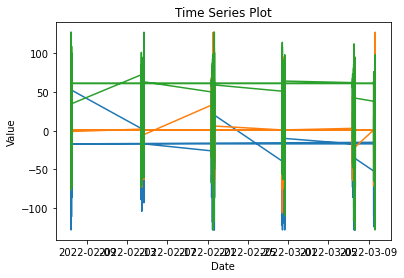

In [13]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['X'])
ax.plot(final_df.datetime, final_df['Y'])
ax.plot(final_df.datetime, final_df['Z'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

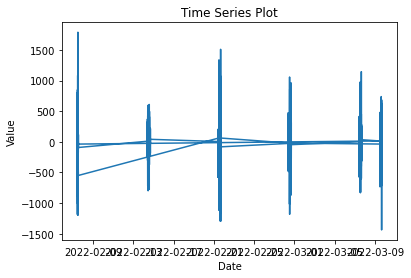

In [14]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['BVP'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

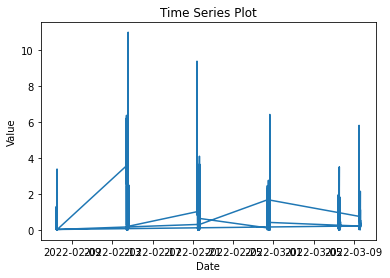

In [15]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['EDA'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

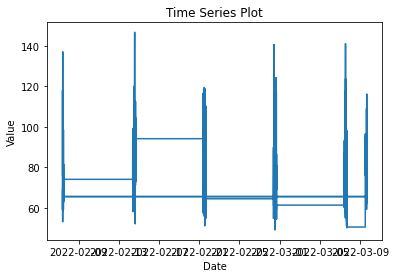

In [16]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['HR'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

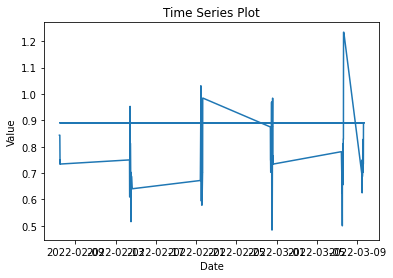

In [18]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['Interval'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

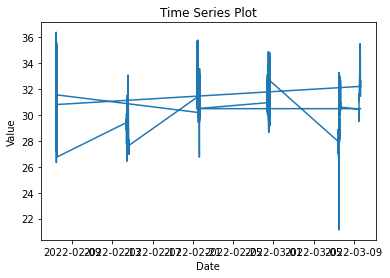

In [19]:
"""Code taken from chatgpt"""

fig, ax = plt.subplots()

ax.plot(final_df.datetime, final_df['TEMP'])

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')

plt.show()

In [9]:
#Dropping unecessary columns which are not required

final_df.drop({'id','Time(sec)'},axis = 1,inplace = True)

In [10]:
final_df.head()

,X,Y,Z,BVP,EDA,HR,Initial,Interval,TEMP,Label
0,-37.0,-30.0,43.0,-2.86,0.370282,68.98,3148.40625,0.84375,27.93,0
1,-37.0,-30.0,43.0,-2.86,0.370282,68.98,3148.40625,0.84375,34.75,0
2,-37.0,-30.0,43.0,-2.86,0.619187,68.98,3148.40625,0.84375,27.93,0
3,-37.0,-30.0,43.0,-2.86,0.619187,68.98,3148.40625,0.84375,34.75,0
4,-37.0,-30.0,43.0,-14.91,0.370282,68.98,3148.40625,0.84375,27.93,0


In [11]:
#Checking null values in the dataframe
final_df.isnull().sum()

X           0
Y           0
Z           0
BVP         0
EDA         0
HR          0
Initial     0
Interval    0
TEMP        0
Label       0
dtype: int64

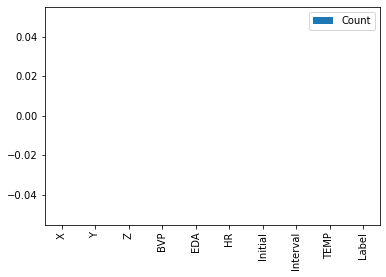

In [12]:
#No null value so visulization is empty ####################################
null_count = pd.DataFrame(final_df.isnull().sum(), columns=['Count'])
null_count.plot(kind='bar')
plt.show()

In [13]:
#Checking duplicates
final_df.duplicated().sum()

575885

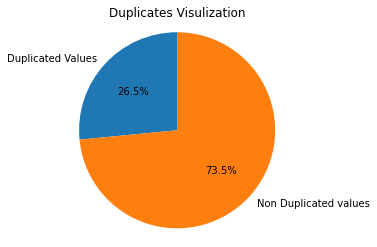

In [14]:
#Visulize duplicated values
labels = ['Duplicated Values', 'Non Duplicated values']
sizes = [final_df.duplicated().sum(), final_df.shape[0] - final_df.duplicated().sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Duplicates Visulization')
plt.show()

In [15]:
final_df.drop_duplicates(inplace = True)

In [16]:
#Checking if the data is imbalanced or not
final_df['Label'].value_counts()

0    986245
1    609067
Name: Label, dtype: int64

In [17]:
#From the ratio of 0 to 1 we can clearly see the data is highly imbalanced

<AxesSubplot:xlabel='Label', ylabel='count'>

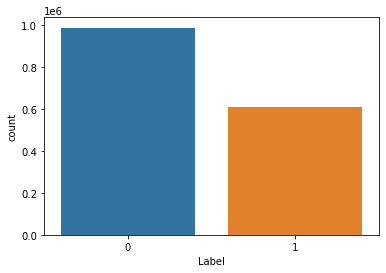

In [18]:
sns.countplot(final_df['Label'])

In [19]:
#Have to resample the data to balance the data

In [20]:
from sklearn.utils import resample

In [21]:
#Seperate the minority which is 1 and majority which is 0 so that we can downsample 0 and match to 1's length
majority = final_df[final_df['Label'] == 0]
minority = final_df[final_df['Label'] == 1]

In [22]:
#Downsampling majority which is 0
downsampled_majority_data = resample(majority,replace=False,n_samples=len(minority),random_state=100)

In [23]:
#finally concating downsampled majority and minority
final_data = pd.concat([downsampled_majority_data, minority])

In [24]:
#reset index because the random sample has jumbled the indexs
final_data.reset_index(inplace = True,drop = True)

In [25]:
final_data.head()

,X,Y,Z,BVP,EDA,HR,Initial,Interval,TEMP,Label
0,-57.0,-9.0,30.0,-17.48,0.812700,99.78,2872.640625,0.625000,30.45,0
1,-42.0,-7.0,-47.0,24.78,0.337257,107.70,21.109375,0.578125,30.63,0
2,-45.0,-46.0,-6.0,121.05,1.172754,94.98,32.437500,0.703125,32.63,0
3,0.0,-63.0,6.0,6.52,0.493461,82.70,77.390625,0.750000,31.09,0
4,-3.0,-8.0,63.0,4.60,0.451431,78.48,3279.609375,0.718750,31.61,0


In [26]:
final_data['Label'].value_counts()

0    609067
1    609067
Name: Label, dtype: int64

In [27]:
#The data is balanced now

<AxesSubplot:xlabel='Label', ylabel='count'>

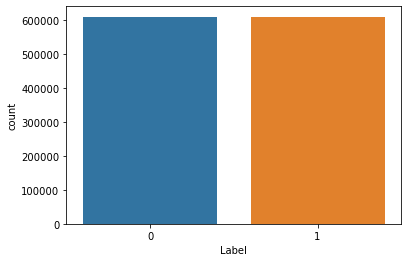

In [28]:
sns.countplot(final_data['Label'])

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'EDA'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'Initial'}>,
        <AxesSubplot:title={'center':'Interval'}>,
        <AxesSubplot:title={'center':'TEMP'}>],
       [<AxesSubplot:title={'center':'Label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

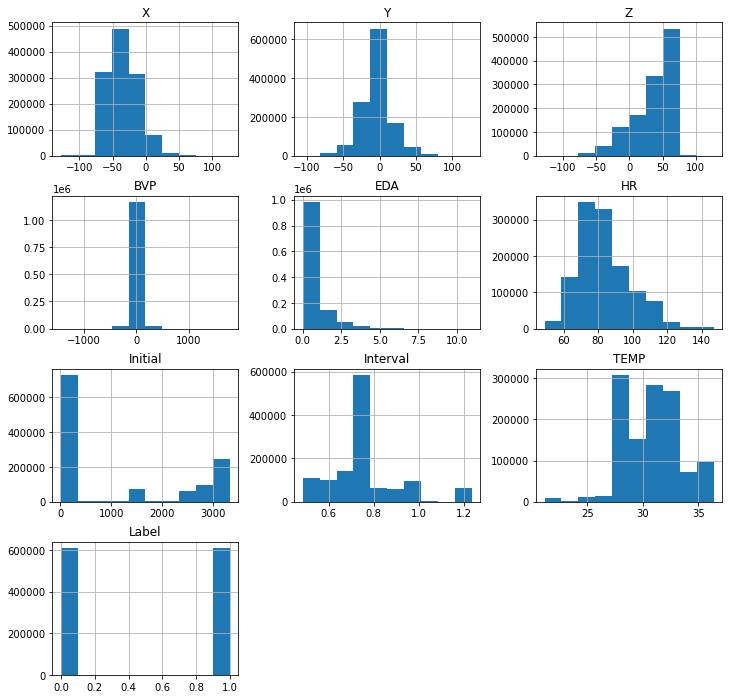

In [29]:
#Visulizaing histogram to check if the data is normally distributed
final_data.hist(figsize =  (12,12))

In [30]:
#Checking correlation of each attriobute to the dependent variable
final_data.corr()

,X,Y,Z,BVP,EDA,HR,Initial,Interval,TEMP,Label
X,1.000000,-0.116045,0.531392,-0.006447,-0.032495,-0.072231,0.125753,-0.079980,0.095645,0.023314
Y,-0.116045,1.000000,-0.108709,-0.001657,0.057526,0.016334,-0.037265,-0.029057,0.013186,0.005070
Z,0.531392,-0.108709,1.000000,-0.010209,-0.013414,-0.095350,0.167060,-0.040581,0.139097,0.014456
BVP,-0.006447,-0.001657,-0.010209,1.000000,0.006305,0.002195,-0.001575,0.005898,0.002292,0.000044
EDA,-0.032495,0.057526,-0.013414,0.006305,1.000000,0.013298,-0.113320,0.061764,-0.049866,0.002242
HR,-0.072231,0.016334,-0.095350,0.002195,0.013298,1.000000,-0.260067,-0.246085,-0.231141,0.064492
Initial,0.125753,-0.037265,0.167060,-0.001575,-0.113320,-0.260067,1.000000,0.153116,0.248157,-0.020314
Interval,-0.079980,-0.029057,-0.040581,0.005898,0.061764,-0.246085,0.153116,1.000000,0.226599,0.030000
TEMP,0.095645,0.013186,0.139097,0.002292,-0.049866,-0.231141,0.248157,0.226599,1.000000,-0.030544
Label,0.023314,0.005070,0.014456,0.000044,0.002242,0.064492,-0.020314,0.030000,-0.030544,1.000000


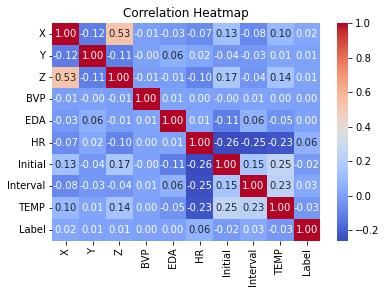

In [31]:
sns.heatmap(final_data.corr(), cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

# Splitting the data into two parts, training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = final_data.drop('Label', axis=1)  # Features
y = final_data['Label']  # Target variable

#Splitting the data into training 70% and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model1 = LogisticRegression(random_state=42).fit(X_train, y_train)
model1_pred = model1.predict(X_test)

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

model1_precision = precision_score(y_test,model1_pred)
model1_recall = recall_score(y_test,model1_pred)
model1_f1 = f1_score(y_test,model1_pred)

print('Precision of model 1 is:- ',model1_precision)
print('Recall of model 1 is:- ',model1_recall)
print('F1_score of model 1 is:- ',model1_f1)

Precision of model 1 is:-  0.5313594769057685
Recall of model 1 is:-  0.522069365553622
F1_score of model 1 is:-  0.5266734568259042


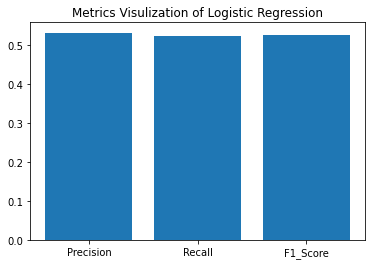

In [37]:
labels = ['Precision', 'Recall', 'F1_Score']
sizes = [model1_precision, model1_recall, model1_f1]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, sizes)
plt.title('Metrics Visulization of Logistic Regression')
plt.show()

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model2 = RandomForestClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
model2_pred = model2.predict(X_test)

In [40]:
model2_precision = precision_score(y_test,model2_pred)
model2_recall = recall_score(y_test,model2_pred)
model2_f1 = f1_score(y_test,model2_pred)

print('Precision of model 2 is:- ',model2_precision)
print('Recall of model 2 is:- ',model2_recall)
print('F1_score of model 2 is:- ',model2_f1)

Precision of model 2 is:-  0.5576419778885672
Recall of model 2 is:-  0.6133018134856792
F1_score of model 2 is:-  0.5841490237775068


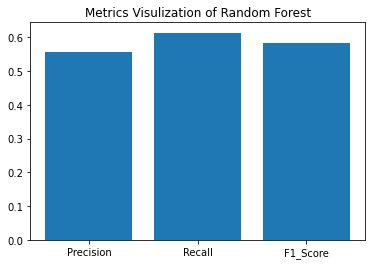

In [41]:
labels = ['Precision', 'Recall', 'F1_Score']
sizes = [model2_precision, model2_recall, model2_f1]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, sizes)
plt.title('Metrics Visulization of Random Forest')
plt.show()

# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
model3 = GaussianNB().fit(X_train, y_train)
model3_pred = model3.predict(X_test)

In [44]:
model3_precision = precision_score(y_test,model3_pred)
model3_recall = recall_score(y_test,model3_pred)
model3_f1 = f1_score(y_test,model3_pred)

print('Precision of model 3 is:- ',model3_precision)
print('Recall of model 3 is:- ',model3_recall)
print('F1_score of model 3 is:- ',model3_f1)

Precision of model 3 is:-  0.5482111257467502
Recall of model 3 is:-  0.4509417648925808
F1_score of model 3 is:-  0.49484177025160636


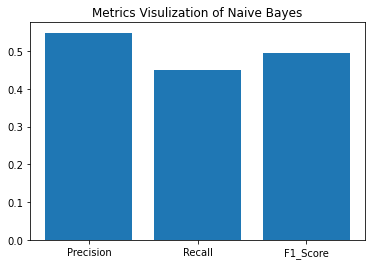

In [45]:
labels = ['Precision', 'Recall', 'F1_Score']
sizes = [model3_precision, model3_recall, model3_f1]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, sizes)
plt.title('Metrics Visulization of Naive Bayes')
plt.show()